## 4.2 Implementation
#### 1. Hyperparameters
Hyperparameters included the learning rate - epsilon, the minibatch size, the momentum factor, and the number of hidden layer nodes. I chose a learning schedule of 0.01 that decayed by 75% every 10 epochs, a minibatch size of 50 rows, a momentum factor of 0.1, and 800 hidden layer nodes

#### 2. Training Accuracy
I set the neural network to stop running at 89% training accuracy validity, which occured after 44 epochs. The final training accuracy was 89.06%

#### 3. Validation Accuracy
The accuracy of the model on the validation set was 88.42%

#### 4. 

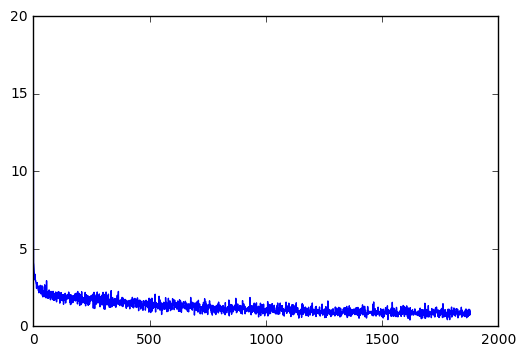

In [42]:
meanLoss = np.mean(tLoss, axis = 1)
plt.plot(meanLoss)
plt.show()

#### 5. Kaggle
Display Name: PaulKim
Score: 0.85606
#### 6. Code at the end



## 4.3 Visualization

In [84]:
predictions = predict(validX, tV, tW, 0)[1]

In [152]:
count = 0
for i in range(24959):
    if sum(np.square(predictions[:, i] - validY[:, i])) != 0.0:
        print(i)
        count = count + 1
        if count > 5:
            break

wrong = [2, 16, 27, 32, 33, 36]
right = [4, 5, 6, 7, 8]

2
16
27
32
33
36


In [165]:
trainX.shape
validX.shape
wrongX = validX[wrong]
wrongY = validY[:, wrong]
rightX = validX[right]
rightY = validY[:, right]


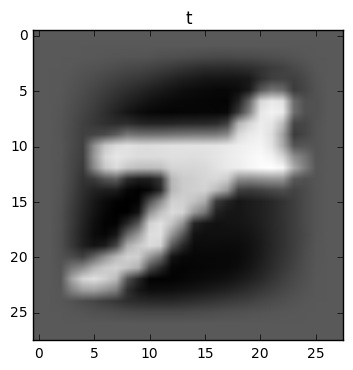

In [146]:
X = np.reshape(wrongX[0, :784], (28, 28))
plt.imshow(X, cmap = 'gray')
plt.title('t')
plt.show()

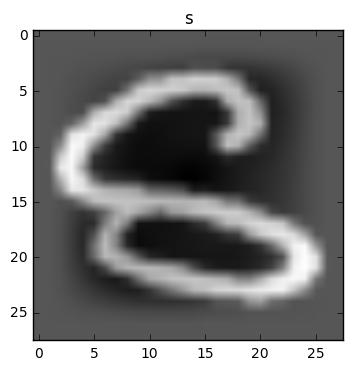

In [147]:
X = np.reshape(wrongX[1, :784], (28, 28))
plt.imshow(X, cmap = 'gray')
plt.title('s')
plt.show()

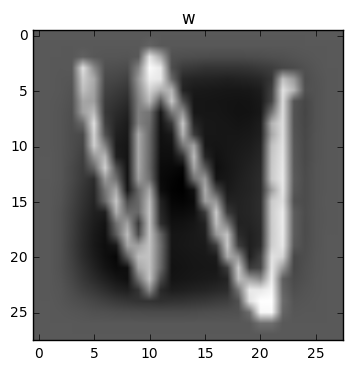

In [151]:
X = np.reshape(wrongX[2, :784], (28, 28))
plt.imshow(X, cmap = 'gray')
plt.title('w')
plt.show()

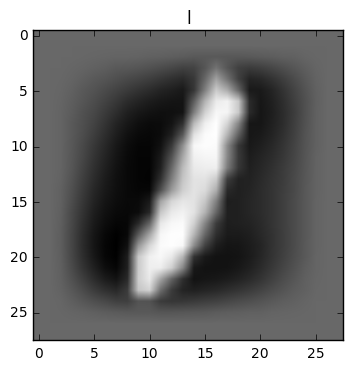

In [150]:
X = np.reshape(wrongX[3, :784], (28, 28))
plt.imshow(X, cmap = 'gray')
plt.title('l')
plt.show()

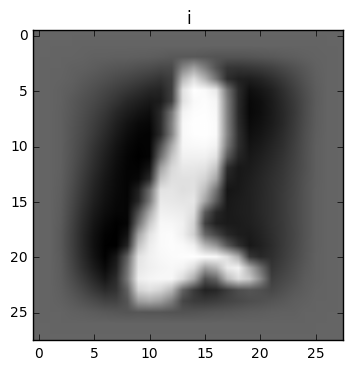

In [149]:
X = np.reshape(wrongX[4, :784], (28, 28))
plt.imshow(X, cmap = 'gray')
plt.title('i, wrong')
plt.show()

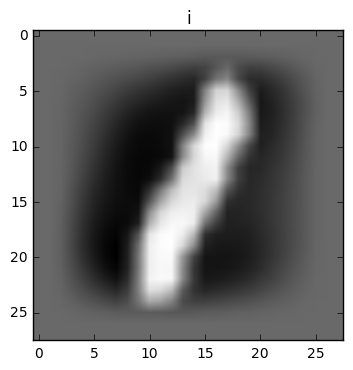

In [156]:
X = np.reshape(rightX[0, :784], (28, 28))
plt.imshow(X, cmap = 'gray')
plt.title('i')
plt.show()

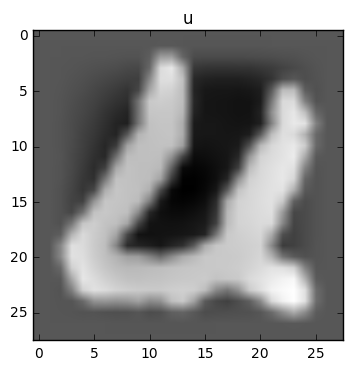

In [158]:
X = np.reshape(rightX[1, :784], (28, 28))
plt.imshow(X, cmap = 'gray')
plt.title('u')
plt.show()

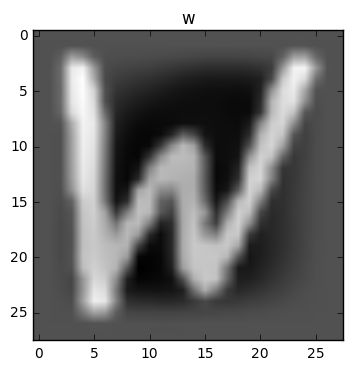

In [160]:
X = np.reshape(rightX[2, :784], (28, 28))
plt.imshow(X, cmap = 'gray')
plt.title('w')
plt.show()

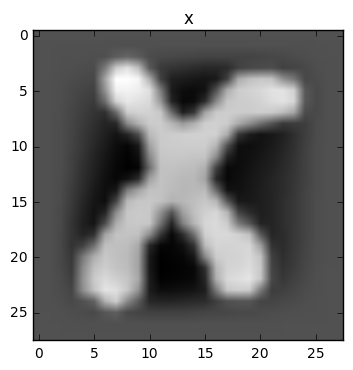

In [162]:
X = np.reshape(rightX[3, :784], (28, 28))
plt.imshow(X, cmap = 'gray')
plt.title('x')
plt.show()

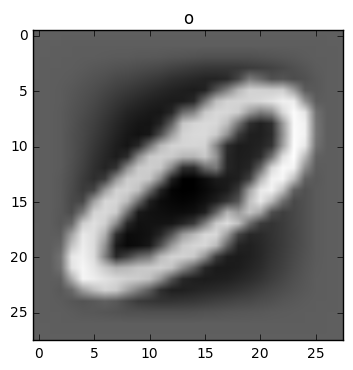

In [164]:
X = np.reshape(rightX[4, :784], (28, 28))
plt.imshow(X, cmap = 'gray')
plt.title('o')
plt.show()

## 4.4 Bells and Whistles
The extra functionality I implemented includes decaying learning rates, extra hidden layer nodes (800), mini-batch gradient descent for improved training time, and momentum. 

In [75]:
import numpy as np
import scipy as scp
from scipy.io import loadmat
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
####### Neural Network Implementation ######

def trainNeuralNetwork(images, labels, epsilon, lam, iterations, batch_size, olddV, olddW, V, W):
    loss = []
    iteration = []
    oldUpdateV = olddV
    oldUpdateW = olddW
    for i in range(iterations):
        minibatch = np.random.randint(low = images.shape[0], size = (batch_size))
        image = images[minibatch, :]
        label = labels[:, minibatch]
        h, z = forward(image, V, W, lam)
        dV, dW = backward(image, label, z, V, W, h, lam)
        dV = dV / batch_size
        dW = dW / batch_size
        V = V - ((0.9 * epsilon * dV) + (0.1 * oldUpdateV))
        W = W - ((0.9 * epsilon * dW) + (0.1 * oldUpdateW))
        oldUpdateV = -((0.9 * epsilon * dV) + (0.1 * oldUpdateV))
        oldUpdateW = -((0.9 * epsilon * dW) + (0.1 * oldUpdateW))
        if i%50 == 0:
            loss.append(calculate_loss(z, label))
    return V, W, loss, oldUpdateV, oldUpdateW

def forward(im, V, W, lam):
    h = np.tanh(V.dot(im.T)) # 200 x 50
    h = np.concatenate((h, np.ones((1, h.shape[1]))), axis = 0)
    z = scp.special.expit(W.dot(h)) # 26 x 50
    return h, z

def backward(im, label, z, V, W, h, lam):
    gradLz = ((z-label)/(z*(1-z))) # 26 x 50
    optim = np.multiply(z, (1 - z)) # 26 x 50
    gradLw = np.multiply(gradLz, optim).dot(h.T) # 26 x 201 possible problem
    gradLh = W.T.dot(np.multiply(optim, gradLz)) # (201x26).(26x1)*(26x1) = 201x1
    gradLh = gradLh[:800,:] # shave off last row of gradLh
    gradLv = np.multiply((1/np.square(np.cosh(V.dot(im.T)))).dot(im), np.sum(gradLh, axis = 1, keepdims = True))  #(200x785).(785x1).(1x785) * 200x1 = 200x785
    return gradLv, gradLw

def predict(im, V, W, lam):
    _, pred = forward(im, V, W, lam)
    prediction = np.zeros((pred.shape[0], pred.shape[1]))
    for i in range(pred.shape[0]):
        for j in range(pred.shape[1]):
            if pred[i,j] == np.max(pred[:,j]):
                prediction[i,j] = 1
    return pred, prediction

def score(actual, predicted):
    return 1 - (np.sum(np.square(predicted - actual))/2)/predicted.shape[1]

def calculate_loss(z, y):
    return -sum(np.multiply(y, np.log(z)) + np.multiply(1-y, np.log(1-z)))

def meta(images, labels, epsilon, lam, epochs, batch_size, V = np.random.randn(200, 785) / np.sqrt(785), W = np.random.randn(26, 201) / np.sqrt(201)):
    iterations = int(images.shape[0] / batch_size)
    Tloss = []
    Titerations = np.arange(0, epochs * iterations, 50)
    olddV = 0
    olddW = 0
    epsilon = epsilon
    for i in range(epochs):
        V, W, loss, olddV, olddW = trainNeuralNetwork(images, labels, epsilon, lam, iterations, batch_size, olddV, olddW, V, W)
        Tloss.extend(loss)
        scr = score(labels, predict(images, V, W, lam)[0])
        if scr > 0.89:
            return V, W, Tloss, Titerations
        if (i + 1) % 10 == 0 and epsilon > 0.00134:
            epsilon = epsilon * 0.75
            
    return V, W, Tloss, Titerations

In [3]:
###### Data preprocessing ######
t = loadmat("hw6_data_dist/letters_data.mat")

In [5]:
trainX = np.array(t.get('train_x'))
testX = np.array(t.get('test_x'))
trainY = np.array(t.get('train_y'))

split = int(np.round(trainX.shape[0] * 0.8))
X = np.concatenate((trainX, trainY), axis = 1)
np.random.shuffle(X)

validX = X[split:, :784]
trainX = X[:split, :784]
validY = X[split:, 784]
trainY = X[:split, 784]

### Centering and Normalizing ###
trainX = trainX / 255
validX = validX / 255
testX = testX / 255
center = np.mean(trainX, axis = 0)
trainX = trainX - center
validX = validX - center
testX = testX - center

trainX = np.concatenate((trainX, np.ones((trainX.shape[0],1))), axis = 1)
testX = np.concatenate((testX, np.ones((testX.shape[0], 1))), axis = 1)
validX = np.concatenate((validX, np.ones((validX.shape[0], 1))), axis = 1)

### 1 hot encoding labels ###
trainLab = np.zeros((26, len(trainY)))
validLab = np.zeros((26, len(validY)))

counter = 0
for lab in trainY:
    trainLab[lab - 1, counter] = 1
    counter += 1

counter = 0
for lab in validY:
    validLab[lab - 1, counter] = 1
    counter += 1
    
trainY = trainLab
validY = validLab


In [147]:
### Testing
#testV, testW = trainNeuralNetwork(trainX, trainY, 0.001, 0, 2000, 50)


In [7]:
V = np.random.randn(800, 785) / np.sqrt(785)
W = np.random.randn(26, 801) / np.sqrt(801)
tV, tW, tLoss, tIter = meta(trainX, trainY, 0.01, 0, 1000, 50, V, W)

0.710939248402
0.736878770475
0.750544807675
0.758629018733
0.766341497646
0.775071193133
0.780946892123
0.789149406164
0.796794854499
0.804627844192
0.810463192606
0.816461488233
0.821350316391
0.827283047078
0.832228842872
0.836029696711
0.840420279936
0.844689826518
0.848522346434
0.852239505836
0.855907648833
0.858295914008
0.860111390772
0.8624910072
0.863949605377
0.866467964105
0.868296732959
0.870006150948
0.872237288387
0.873512244647
0.87535572109
0.87662975815
0.877735562633
0.878947622478
0.880097781738
0.881529050809
0.882425454202
0.88355798169
0.884499748197
0.885273419512
0.886200755888
0.887291791969
0.887741081822
0.888884319072
0.889126501069
0.889927314213


In [43]:
score(validY, predict(validX, tV, tW, 0)[1])


0.85845352564102562

In [44]:
score(trainY, predict(trainX, tV, tW, 0)[1])

0.86917067307692308

In [47]:
prediction = predict(testX, tV, tW, 0)[1]


array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [73]:
print(prediction.shape)
pred = np.zeros((len(testX)))
for i in range(prediction.shape[1]):
    for j in range(26):
        if prediction[j, i] == 1:
            pred[i] = j + 1

(26, 20800)


1.0

In [77]:
d = {
    "Id": np.arange(1, len(pred) + 1),
    "Category": pred
}
df = pd.DataFrame(data=d)
df.to_csv("numbers.csv", index=False)